C:\Users\sneee\AppData\Local\Temp\ipykernel_13264\2413585773.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Event'] = df['Event'].replace({


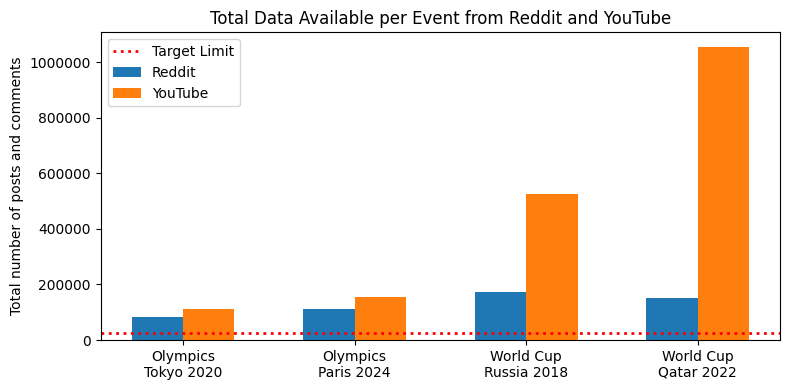

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('datasets/data_collection.csv')
event_order = df['Event'].unique()
df['Event'] = pd.Categorical(df['Event'], categories=event_order, ordered=True)
df['Event'] = df['Event'].replace({
    'Tokyo 2020': 'Olympics\nTokyo 2020',
    'Paris 2024': 'Olympics\nParis 2024',
    'Russia 2018': 'World Cup\nRussia 2018',
    'Qatar 2022': 'World Cup\nQatar 2022'
})

df['Total'] = df['Posts'] + df['Comments']
pivot = df.pivot(index='Event', columns='Platform', values='Total')

x = np.arange(len(pivot))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x - width/2, pivot['Reddit'], width, label='Reddit')
ax.bar(x + width/2, pivot['YouTube'], width, label='YouTube')

ax.set_ylabel('Total number of posts and comments')
ax.set_title('Total Data Available per Event from Reddit and YouTube')

ax.set_xticks(x)
ax.set_xticklabels(pivot.index)
ax.ticklabel_format(style='plain', axis='y')

ax.axhline(25000, color='red', linestyle='dotted', linewidth=2, label='Target Limit')

ax.legend()
plt.tight_layout()
plt.show()
